### Import Libraries

In [617]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Loading and Cleaning

In [618]:
data = pd.read_csv('./drive/MyDrive/data.csv')
data.head()

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,Account_Fiscal_Year_End,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue
0,10/1/19,0064100000TL1Fw,Stage 3 - Pricing,New Business,NaN,9/12/18,11/12/19,Diversion Monitoring,Epic,Childrens Hospital,12/31/23,OH,43205.0,2.0,694.0,2196.0,7282.0,85077078.0,3.652792e+09,2.048661e+09
1,10/1/19,0064100000TKWAx,Stage 3 - Pricing,New Business,NaN,9/7/18,12/12/19,Privacy Monitoring,Epic,Health System,NaN,HI,96813.0,4.0,602.0,1829.0,4443.0,-242188.0,3.560499e+09,1.340713e+09
2,10/1/19,0064100000TKw69,Stage 2 - Scoping,New Business,NaN,9/11/18,4/15/20,Diversion Monitoring,Epic,Health System,NaN,MI,49503.0,10.0,1901.0,4000.0,NaN,982985681.0,7.869236e+09,3.290488e+09
3,10/1/19,0064100000TK0q9,Stage 2 - Scoping,New Business,NaN,8/29/18,2/22/20,Diversion Monitoring,Epic,Health System,NaN,OH,43604.0,12.0,1594.0,2481.0,NaN,165601560.0,1.075654e+10,2.468940e+09
4,10/1/19,0064100000QhXXx,Stage 3 - Pricing,New Business,NaN,6/26/18,12/10/19,Privacy Monitoring,Epic,Health System,NaN,WI,53226.0,10.0,1259.0,2666.0,8197.0,20765609.0,1.024796e+10,3.881722e+09


In [619]:
data = data.rename(columns={'Account_Number_of_Hospitals ' : 'Account_Number_of_Hospitals'})

In [620]:
# Sorting the DataFrame to ensure it's in the right order
data.sort_values(by=['Opportunity_ID', 'Snapshot_Date'], inplace=True)

# Applying forward and backward fill for each group
data['Opportunity_Annual_Amount'] = data.groupby('Opportunity_ID')['Opportunity_Annual_Amount'].apply(lambda x: x.ffill().bfill())
data['Opportunity_Annual_Amount'].isna().sum()

<ipython-input-620-c30c7572d8d2>:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



28

In [621]:
data = data.dropna(subset = ['Opportunity_Annual_Amount'])

In [622]:
data.shape

(8816, 20)

In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8816 entries, 2483 to 264
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Snapshot_Date                             8816 non-null   object 
 1   Opportunity_ID                            8816 non-null   object 
 2   Opportunity_Stage                         8816 non-null   object 
 3   Opportunity_Type                          8816 non-null   object 
 4   Opportunity_Annual_Amount                 8816 non-null   float64
 5   Opportunity_Created_Date                  8816 non-null   object 
 6   Opportunity_Close_Date                    8816 non-null   object 
 7   Opportunity_Product                       8816 non-null   object 
 8   Account_Electronic_Medical_Record_System  8816 non-null   object 
 9   Account_Hospital_Type                     8170 non-null   object 
 10  Account_Fiscal_Year_End           

In [624]:
date_cols = ['Snapshot_Date', 'Opportunity_Created_Date', 'Opportunity_Close_Date',
               'Opportunity_Close_Date']

In [625]:
## Convert date columns to date-time data type
data['Snapshot_Date'] = pd.to_datetime(data['Snapshot_Date'])
data['Opportunity_Created_Date'] = pd.to_datetime(data['Opportunity_Created_Date'])
data['Opportunity_Close_Date'] = pd.to_datetime(data['Opportunity_Close_Date'])
data['Account_Fiscal_Year_End'] = pd.to_datetime(data['Account_Fiscal_Year_End'])
data['Opportunity_Close_Date'] = pd.to_datetime(data['Opportunity_Close_Date'])

In [626]:
data['CreatedDate_FiscalYear'] = (data['Account_Fiscal_Year_End'] - data['Opportunity_Created_Date']).dt.days
fig = px.scatter(data[data['Opportunity_Annual_Amount'] < 1000000],
                 x='CreatedDate_FiscalYear',
                 y='Opportunity_Annual_Amount',
                 color='Opportunity_Stage',
                 opacity=0.8,
                 hover_data=['Snapshot_Date'],
                 title='Fiscal Year End vs. Opportunity Annual Amount')
fig.update_traces(marker_size=5)
fig.show()



In [627]:
data['Snapshot_FiscalYear'] = (data['Account_Fiscal_Year_End'] - data['Snapshot_Date']).dt.days
fig = px.scatter(data[data['Opportunity_Annual_Amount'] < 1000000],
                 x='Snapshot_FiscalYear',
                 y='Opportunity_Annual_Amount',
                 color='Opportunity_Stage',
                 opacity=0.8,
                 hover_data=['Snapshot_Date'],
                 title='Fiscal Year End vs. Opportunity Annual Amount')
fig.update_traces(marker_size=5)
fig.show()


In [628]:
fig = px.scatter(data[data['Opportunity_Annual_Amount'] < 1000000],
                 x='Account_Fiscal_Year_End',
                 y='Opportunity_Annual_Amount',
                 color='Opportunity_Stage',
                 opacity=0.8,
                 hover_data=['Snapshot_Date'],
                 title='Fiscal Year End vs. Opportunity Annual Amount')
fig.update_traces(marker_size=5)
fig.show()


In [629]:
## No correlation was observed bw Fiscal Year End
## and Opportunity Annual Amount
##
## Decided to drop Fiscal Year End column

data = data.drop('Account_Fiscal_Year_End', axis = 1)

In [630]:
## Add Year, Month, Day, Week
for column in date_cols:
               data[column + '_Year'] = data[column].dt.year
               data[column + '_Month'] = data[column].dt.month
               data[column + '_Day'] = data[column].dt.day
               data[column + '_Week'] = data[column].dt.week
               data[column + '_Quarter'] = data[column].dt.quarter

<ipython-input-630-4cc5ff813db8>:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-630-4cc5ff813db8>:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-630-4cc5ff813db8>:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

<ipython-input-630-4cc5ff813db8>:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



Stage 0 - Prospecting, Stage 1 - Evaluating, Stage 2 - Scoping,  Stage 3 - Pricing, Stage 4 - Verbal / VOC, Stage 5 - Contracting, Closed Lost, Closed Won

In [631]:
data['ClosedWon'] = data.apply(lambda row: int(row.Opportunity_Stage == 'Closed Won'), axis = 1)
data['ClosedLost'] = data.apply(lambda row: int(row.Opportunity_Stage == 'Closed Lost'), axis = 1)

In [632]:
pd.set_option('mode.chained_assignment', None)
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 0 - Prospecting')] = 0
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 1 - Evaluating')] = 1
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 2 - Scoping')] = 2
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 3 - Pricing')] = 3
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 4 - Verbal / VOC')] = 4
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Stage 5 - Contracting')] = 5
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Closed Lost')] = 6
data['Opportunity_Stage'].loc[(data['Opportunity_Stage'] == 'Closed Won')] = 6

In [633]:
## One-hot encoding for Opportunity_Type

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(data[['Opportunity_Type']])
one_hot = enc.transform(data[['Opportunity_Type']]).toarray()
data[['Opportunity_Type_Existing_Business', 'Opportunity_Type_New_Business']] = one_hot

In [634]:
fig = px.scatter(data,
                 x='Account_Number_of_Employee',
                 y='Opportunity_Annual_Amount',
                 color='Opportunity_Stage',
                 opacity=0.8,
                 hover_data=['Snapshot_Date'],
                 title='Employee vs Opportunity Annual Amount')
fig.update_traces(marker_size=5)
fig.show()

In [635]:
data['Account_Number_of_Employee'].corr(data['Opportunity_Annual_Amount'])

0.7315152680902699

In [636]:
indexProduct = data[data['Opportunity_Product'] == '0'].index
data.drop(indexProduct , inplace=True)
data['Opportunity_Product'].value_counts()

Diversion Monitoring    4650
Privacy Monitoring      3790
Compliance Analytics     371
Name: Opportunity_Product, dtype: int64

In [637]:
enc.fit(data[['Opportunity_Product']])
one_hot = enc.transform(data[['Opportunity_Product']]).toarray()
data[['Opportunity_Product_Compliance_Analytics',
      'Opportunity_Product_Diversion_Monitoring',
      'Opportunity_Product_Privacy_Monitoring']] = one_hot
data.head()

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,...,Opportunity_Close_Date_Day,Opportunity_Close_Date_Week,Opportunity_Close_Date_Quarter,ClosedWon,ClosedLost,Opportunity_Type_Existing_Business,Opportunity_Type_New_Business,Opportunity_Product_Compliance_Analytics,Opportunity_Product_Diversion_Monitoring,Opportunity_Product_Privacy_Monitoring
2483,2021-01-01,0061K00000b3JMy,2,New Business,167838.3211,2019-03-05,2021-06-30,Privacy Monitoring,Other,Short Term Acute Care Hospital,...,30,26,2,0,0,0.0,1.0,0.0,0.0,1.0
116,2019-10-01,0061K00000b3JMy,2,New Business,167838.3211,2019-03-05,2020-01-15,Privacy Monitoring,Other,Short Term Acute Care Hospital,...,15,3,1,0,0,0.0,1.0,0.0,0.0,1.0
1908,2020-10-01,0061K00000b3JMy,2,New Business,167838.3211,2019-03-05,2021-03-31,Privacy Monitoring,Other,Short Term Acute Care Hospital,...,31,13,1,0,0,0.0,1.0,0.0,0.0,1.0
246,2019-11-01,0061K00000b3JMy,2,New Business,167838.3211,2019-03-05,2020-07-23,Privacy Monitoring,Other,Short Term Acute Care Hospital,...,23,30,3,0,0,0.0,1.0,0.0,0.0,1.0
2097,2020-11-01,0061K00000b3JMy,2,New Business,167838.3211,2019-03-05,2021-06-30,Privacy Monitoring,Other,Short Term Acute Care Hospital,...,30,26,2,0,0,0.0,1.0,0.0,0.0,1.0


In [638]:
## Account_Electronic_Medical_Record_System
enc.fit(data[['Account_Electronic_Medical_Record_System']])
one_hot = enc.transform(data[['Account_Electronic_Medical_Record_System']]).toarray()
data[['Account_Electronic_Medical_Record_System_Cerner',
      'Account_Electronic_Medical_Record_System_Epic',
      'Account_Electronic_Medical_Record_System_Meditech',
      'Account_Electronic_Medical_Record_System_Other']] = one_hot

In [639]:
data['Account_Hospital_Type'] = data['Account_Hospital_Type'].fillna('Other')
data['Account_Hospital_Type'].value_counts()

Health System                     5985
Short Term Acute Care Hospital    1714
Other                              641
Childrens Hospital                 347
Critical Access Hospital            82
Rehabilitation Hospital             20
Long Term Acute Care Hospital       13
Psychiatric Hospital                 9
Name: Account_Hospital_Type, dtype: int64

In [640]:
## Account_Hospital_Type
enc.fit(data[['Account_Hospital_Type']])
one_hot = enc.transform(data[['Account_Hospital_Type']]).toarray()

data[['Account_Hospital_Type_Childrens_Hospital',
      'Account_Hospital_Type_Critical_Access_Hospital',
      'Account_Hospital_Type_Health_System',
      'Account_Hospital_Type_Long_Term_Acute_Care_Hospital',
      'Account_Hospital_Type_Other',
      'Account_Hospital_Type_Psychiatric_Hospital',
      'Account_Hospital_Type_Rehabilitation_Hospital',
      'Account_Hospital_Type_Short_Term_Acute_Care_Hospital']] = one_hot


In [641]:
data['Account_State'] = data['Account_State'].fillna('Other')

In [642]:
## Account_State

enc.fit(data[['Account_State']])
one_hot = enc.transform(data[['Account_State']]).toarray()
data[list(enc.categories_[0])] = one_hot


In [643]:
## Drop Zip Code
data = data.drop('Account_Zip_Code', axis = 1)

<Axes: xlabel='Account_Number_of_Hospitals', ylabel='Count'>

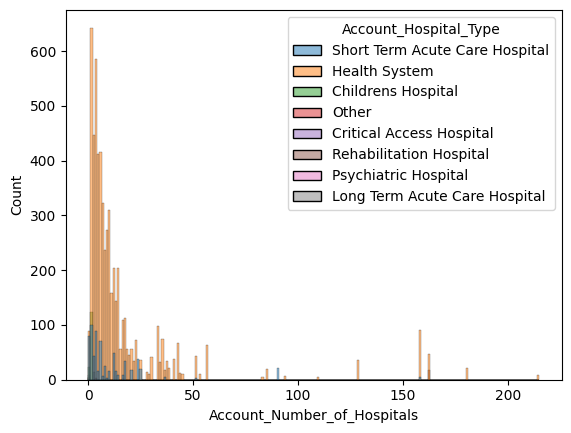

In [644]:
## Account_Number_of_Hospitals

sns.histplot(data=data, x='Account_Number_of_Hospitals', hue='Account_Hospital_Type')

In [645]:
data['Account_Number_of_Hospitals'] = data.groupby('Account_Hospital_Type')['Account_Number_of_Hospitals'].transform(lambda x: x.fillna(x.median()))

<Axes: xlabel='Account_Number_of_Beds', ylabel='Count'>

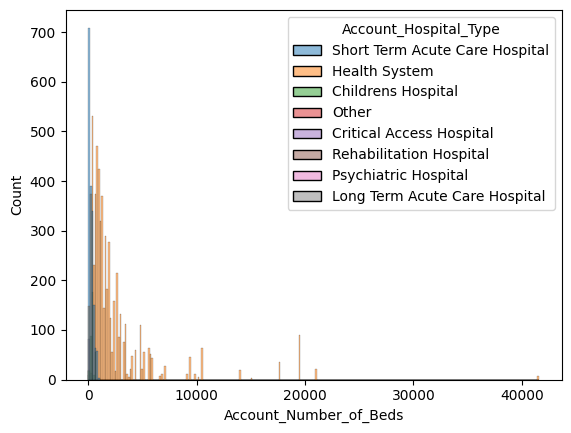

In [646]:
## Account_Number_of_Beds

sns.histplot(data=data, x='Account_Number_of_Beds', hue='Account_Hospital_Type')


In [647]:
data['Account_Number_of_Beds'] = data.groupby('Account_Hospital_Type')['Account_Number_of_Beds'].transform(lambda x: x.fillna(x.median()))

<Axes: xlabel='Account_Number_of_Affiliated_Physicians', ylabel='Count'>

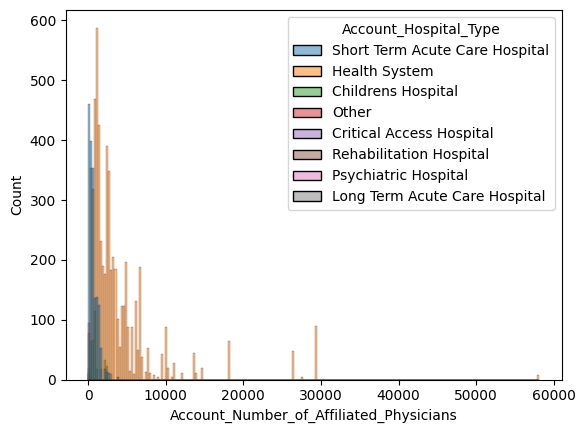

In [648]:
## Account_Number_of_Affiliated_Physicians

sns.histplot(data=data, x='Account_Number_of_Affiliated_Physicians', hue='Account_Hospital_Type')

In [649]:
overall_median = data['Account_Number_of_Affiliated_Physicians'].median()

# Function to fill NaN with group median or overall median if group median is not available
def fill_with_median(x):
    if x.median() > 0:
        return x.fillna(x.median())
    else:
        return x.fillna(overall_median)

# Filling NaN values
data['Account_Number_of_Affiliated_Physicians'] = data.groupby('Account_Hospital_Type')['Account_Number_of_Affiliated_Physicians'].transform(fill_with_median)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Account_Number_of_Employee', ylabel='Count'>

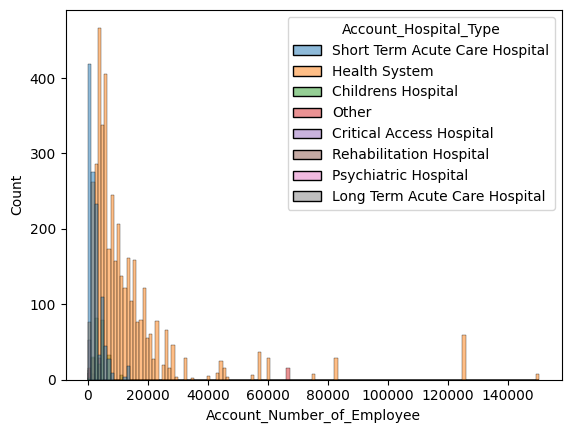

In [650]:
## Account_Number_of_Employee

sns.histplot(data=data, x='Account_Number_of_Employee', hue='Account_Hospital_Type')


In [651]:
overall_median = data['Account_Number_of_Employee'].median()
data['Account_Number_of_Employee'] = data.groupby('Account_Hospital_Type')['Account_Number_of_Employee'].transform(fill_with_median)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Account_Cash_on_Hand', ylabel='Count'>

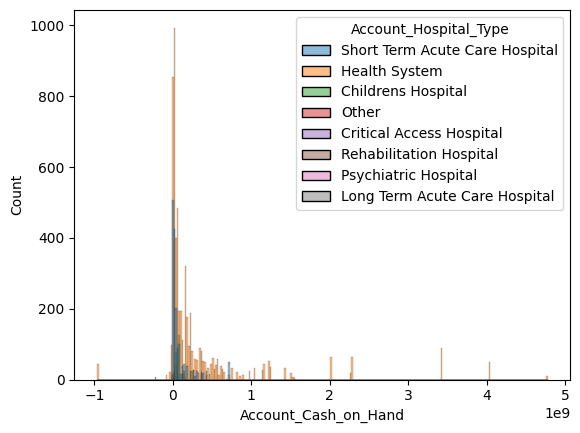

In [652]:
## Account_Cash_on_Hand

sns.histplot(data=data, x='Account_Cash_on_Hand', hue='Account_Hospital_Type')

In [653]:
overall_median = data['Account_Cash_on_Hand'].median()
data['Account_Cash_on_Hand'] = data.groupby('Account_Hospital_Type')['Account_Cash_on_Hand'].transform(fill_with_median)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Account_Total_Patient_Revenue', ylabel='Count'>

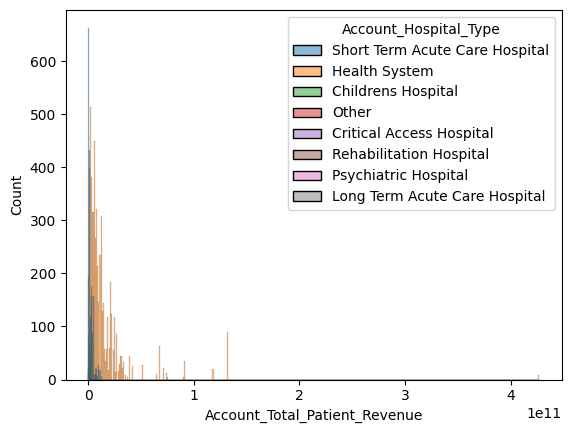

In [654]:
## Account_Total_Patient_Revenue

sns.histplot(data=data, x='Account_Total_Patient_Revenue', hue='Account_Hospital_Type')

In [655]:
overall_median = data['Account_Total_Patient_Revenue'].median()
data['Account_Total_Patient_Revenue'] = data.groupby('Account_Hospital_Type')['Account_Total_Patient_Revenue'].transform(fill_with_median)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



<Axes: xlabel='Account_Net_Patient_Revenue', ylabel='Count'>

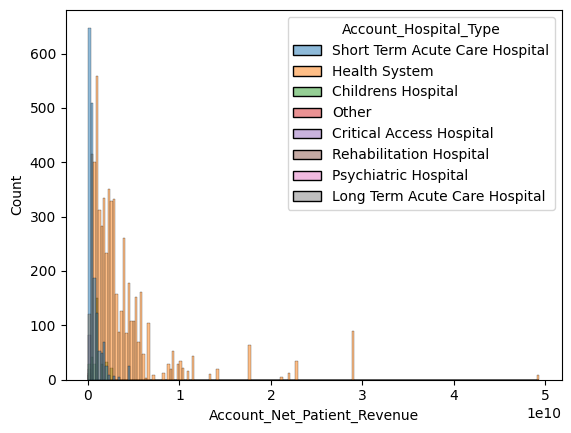

In [656]:
## Account_Net_Patient_Revenue

sns.histplot(data=data, x='Account_Net_Patient_Revenue', hue='Account_Hospital_Type')

In [657]:
overall_median = data['Account_Net_Patient_Revenue'].median()
data['Account_Net_Patient_Revenue'] = data.groupby('Account_Hospital_Type')['Account_Net_Patient_Revenue'].transform(fill_with_median)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



In [658]:
## Engineering new column as difference between initial annual amount and current annual amount
data.sort_values(by=['Opportunity_ID', 'Snapshot_Date'], inplace=True)

# Getting the first estimated sales for each Opportunity_ID
initial_estimates = data.groupby('Opportunity_ID')['Opportunity_Annual_Amount'].first().rename('Initial_Estimate')

# Merging the initial estimates back into the original DataFrame
data = data.merge(initial_estimates, on='Opportunity_ID')

# Calculating the difference
data['Estimate_Difference'] = data['Opportunity_Annual_Amount'] - data['Initial_Estimate']


<Axes: xlabel='Estimate_Difference', ylabel='Count'>

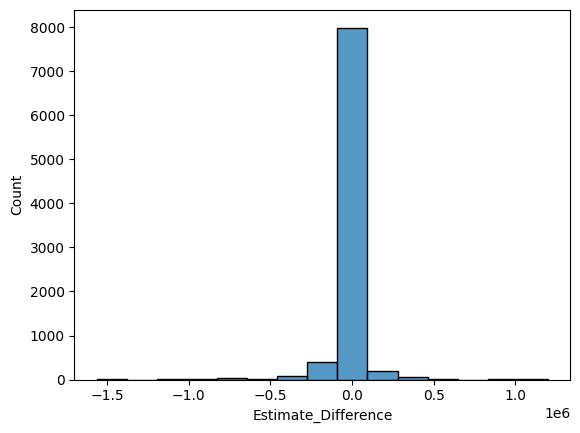

In [659]:
sns.histplot(data=data, x='Estimate_Difference')

In [660]:
data['Expenses'] = data['Account_Total_Patient_Revenue'] - data['Account_Cash_on_Hand']

In [661]:
data.sort_values(by=['Opportunity_ID', 'Snapshot_Date'], inplace=True)

# Getting the initial snapshot date for each Opportunity_ID
initial_snapshots = data.groupby('Opportunity_ID')['Snapshot_Date'].first().rename('Initial_Snapshot_Date')

# Merging the initial snapshot dates back into the original DataFrame
data = data.merge(initial_snapshots, on='Opportunity_ID')

# Calculating the age in months
data['Opportunity_Age_Days'] = (data['Snapshot_Date'] - data['Initial_Snapshot_Date']).dt.days

In [662]:
cannabis_data = pd.read_csv("./drive/MyDrive/cannabis_legality_by_state.csv")
cannabis_data = cannabis_data.rename(columns={'State':"Account_State"})
cannabis_data.head()

,Account_State,Recreational,Medical,Cultivation
0,AL,0,1,0
1,AK,1,1,1
2,AZ,1,1,1
3,AR,0,1,0
4,CA,1,1,1


In [663]:
data = data.merge(cannabis_data, on='Account_State', how='left')

In [664]:
annual_salary = pd.read_csv("./drive/MyDrive/updated_annual_salary_by_state.csv")
data = data.merge(annual_salary, on='Account_State', how='left')
annual_salary.head()

,Account_State,Annual_Salary
0,AL,50620
1,AK,66130
2,AZ,58620
3,AR,48570
4,CA,73220


In [665]:
data['Medical'] = data['Medical'].fillna(cannabis_data[cannabis_data['Account_State'] == 'VA'].iloc[0,1])
data['Recreational'] = data['Recreational'].fillna(cannabis_data[cannabis_data['Account_State'] == 'VA'].iloc[0,2])
data['Cultivation'] = data['Cultivation'].fillna(cannabis_data[cannabis_data['Account_State'] == 'VA'].iloc[0,3])

In [666]:
data['Annual_Salary'] = data['Annual_Salary'].fillna(annual_salary[annual_salary['Account_State'] == 'VA'].iloc[0,1])


In [667]:
physicians_salary = pd.read_csv("./drive/MyDrive/physicians_annual_salary_by_state.csv")
data = data.merge(physicians_salary, on='Account_State', how='left')
physicians_salary.head()

,Account_State,Physicians_Annual_Salary
0,AL,75180
1,AK,110320
2,AZ,93250
3,AR,74720
4,CA,119400


In [668]:
data['Physicians_Annual_Salary'] = data['Physicians_Annual_Salary'].fillna(physicians_salary[physicians_salary['Account_State'] == 'VA'].iloc[0,1])


In [669]:
drop_cols = ['CreatedDate_FiscalYear', 'Snapshot_FiscalYear', 'Opportunity_Stage', 'Opportunity_Type',
             'Opportunity_Product', 'Account_Electronic_Medical_Record_System',
             'Account_Hospital_Type', 'Account_State']
data = data.drop(drop_cols, axis = 1)

In [670]:
list(data.columns)

['Snapshot_Date',
 'Opportunity_ID',
 'Opportunity_Annual_Amount',
 'Opportunity_Created_Date',
 'Opportunity_Close_Date',
 'Account_Number_of_Hospitals',
 'Account_Number_of_Beds',
 'Account_Number_of_Affiliated_Physicians',
 'Account_Number_of_Employee',
 'Account_Cash_on_Hand',
 'Account_Total_Patient_Revenue',
 'Account_Net_Patient_Revenue',
 'Snapshot_Date_Year',
 'Snapshot_Date_Month',
 'Snapshot_Date_Day',
 'Snapshot_Date_Week',
 'Snapshot_Date_Quarter',
 'Opportunity_Created_Date_Year',
 'Opportunity_Created_Date_Month',
 'Opportunity_Created_Date_Day',
 'Opportunity_Created_Date_Week',
 'Opportunity_Created_Date_Quarter',
 'Opportunity_Close_Date_Year',
 'Opportunity_Close_Date_Month',
 'Opportunity_Close_Date_Day',
 'Opportunity_Close_Date_Week',
 'Opportunity_Close_Date_Quarter',
 'ClosedWon',
 'ClosedLost',
 'Opportunity_Type_Existing_Business',
 'Opportunity_Type_New_Business',
 'Opportunity_Product_Compliance_Analytics',
 'Opportunity_Product_Diversion_Monitoring',
 'Oppo

In [505]:
# data.to_csv("./drive/MyDrive/processed_data.csv")

In [506]:
# data = pd.read_csv("./drive/MyDrive/processed_data.csv")

In [507]:
# data = data.drop('Unnamed: 0', axis=1)


In [508]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8811 entries, 0 to 8810
Columns: 107 entries, Snapshot_Date to Physicians_Annual_Salary
dtypes: datetime64[ns](4), float64(84), int64(18), object(1)
memory usage: 7.3+ MB


In [671]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Opportunity_ID'])
data['Opportunity_ID'] = le.transform(data['Opportunity_ID'])


In [672]:
numberic_cols = ['Snapshot_Date',
'Opportunity_Annual_Amount',
'Opportunity_Created_Date',
'Opportunity_Close_Date',
'Account_Number_of_Hospitals',
'Account_Number_of_Beds',
'Account_Number_of_Affiliated_Physicians',
'Account_Number_of_Employee',
'Account_Cash_on_Hand',
'Account_Total_Patient_Revenue',
'Account_Net_Patient_Revenue',
'Snapshot_Date_Year',
'Snapshot_Date_Month',
'Snapshot_Date_Day',
'Snapshot_Date_Week',
'Snapshot_Date_Quarter',
'Opportunity_Created_Date_Year',
'Opportunity_Created_Date_Month',
'Opportunity_Created_Date_Day',
'Opportunity_Created_Date_Week',
'Opportunity_Created_Date_Quarter',
'Opportunity_Close_Date_Year',
'Opportunity_Close_Date_Month',
'Opportunity_Close_Date_Day',
'Opportunity_Close_Date_Week',
'Opportunity_Close_Date_Quarter',
'Initial_Estimate',
'Estimate_Difference',
'Expenses',
'Opportunity_Age_Days',
'Annual_Salary',
'Physicians_Annual_Salary']

num_cols = ['Account_Number_of_Hospitals',
'Account_Number_of_Beds',
'Account_Number_of_Affiliated_Physicians',
'Account_Number_of_Employee',
'Account_Cash_on_Hand',
'Account_Total_Patient_Revenue',
'Account_Net_Patient_Revenue',
            'Initial_Estimate',
'Estimate_Difference',
'Expenses',
'Opportunity_Age_Days',
'Annual_Salary',
'Physicians_Annual_Salary']

category_cols = [
'Opportunity_ID',
'ClosedWon',
'ClosedLost',
'Opportunity_Type_Existing_Business',
'Opportunity_Type_New_Business',
'Opportunity_Product_Compliance_Analytics',
'Opportunity_Product_Diversion_Monitoring',
'Opportunity_Product_Privacy_Monitoring',
'Account_Electronic_Medical_Record_System_Cerner',
'Account_Electronic_Medical_Record_System_Epic',
'Account_Electronic_Medical_Record_System_Meditech',
'Account_Electronic_Medical_Record_System_Other',
'Account_Hospital_Type_Childrens_Hospital',
'Account_Hospital_Type_Critical_Access_Hospital',
'Account_Hospital_Type_Health_System',
'Account_Hospital_Type_Long_Term_Acute_Care_Hospital',
'Account_Hospital_Type_Other',
'Account_Hospital_Type_Psychiatric_Hospital',
'Account_Hospital_Type_Rehabilitation_Hospital',
'Account_Hospital_Type_Short_Term_Acute_Care_Hospital',
'AK',
'AL',
'AR',
'AZ',
'CA',
'CO',
'CT',
'DE',
'FL',
'GA',
'HI',
'IA',
'ID',
'IL',
'IN',
'KS',
'KY',
'LA',
'MA',
'MD',
'ME',
'MI',
'MN',
'MO',
'MS',
'MT',
'NC',
'NE',
'NH',
'NJ',
'NM',
'NV',
'NY',
'OH',
'OK',
'OR',
'Other',
'PA',
'PR',
'RI',
'SC',
'SD',
'TN',
'TX',
'UT',
'VA',
'VT',
'WA',
'WI',
'WV',
'WY',
'Initial_Snapshot_Date',
'Recreational',
'Medical',
'Cultivation',
]


In [673]:
data[(data['Snapshot_Date_Year'] == 2023) & (data['Snapshot_Date_Quarter'] == 3)][['ClosedWon']].sum()

ClosedWon    4
dtype: int64

In [674]:
data[(data['Snapshot_Date_Year'] == 2023) & (data['Snapshot_Date_Quarter'] == 3)]

,Snapshot_Date,Opportunity_ID,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,...,Initial_Estimate,Estimate_Difference,Expenses,Initial_Snapshot_Date,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
3167,2023-07-01,235,197832.40,2020-03-20,2023-10-30,23.0,5202.0,13581.0,7778.0,368968127.0,...,97848.0000,99984.4000,3.916687e+10,2020-05-01,1156,1.0,1.0,1.0,56530.0,87440.0
3460,2023-07-01,259,30240.00,2020-05-22,2024-05-23,4.0,1553.0,3886.0,7778.0,69116947.0,...,82192.3200,-51952.3200,1.297063e+10,2021-05-01,791,0.0,0.0,0.0,56220.0,87180.0
3822,2023-07-01,290,33890.00,2020-07-22,2023-12-23,2.0,352.0,1190.0,4228.0,190886512.0,...,209328.6182,-175438.6182,3.900954e+09,2020-08-01,1064,1.0,1.0,1.0,58620.0,93250.0
4161,2023-07-01,316,81073.32,2020-09-16,2023-11-01,12.0,1900.0,4731.0,11550.0,40220179.0,...,283693.9680,-202620.6480,1.383275e+10,2020-10-01,1003,1.0,1.0,1.0,72350.0,109450.0
4908,2023-07-01,377,75578.99,2021-03-03,2024-01-18,18.0,3507.0,4506.0,16328.0,2697970.0,...,264515.7600,-188936.7700,1.840306e+10,2021-04-01,821,0.0,1.0,0.0,55980.0,89800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,2023-07-01,811,44500.00,2023-06-21,2024-02-01,2.0,350.0,1477.0,3425.0,57319999.0,...,44500.0000,0.0000,5.360624e+09,2023-07-01,0,1.0,1.0,1.0,65590.0,92900.0
8521,2023-07-01,812,61201.00,2023-06-26,2023-12-29,0.0,434.0,775.0,1904.0,131280220.0,...,61201.0000,0.0000,3.064146e+09,2023-07-01,0,0.0,0.0,0.0,57300.0,89750.0
8522,2023-07-01,813,56763.26,2023-06-26,2024-06-30,9.0,1942.0,1980.0,8571.0,298090050.0,...,56763.2600,0.0000,8.044796e+09,2023-07-01,0,1.0,1.0,1.0,65590.0,92900.0
8523,2023-07-01,814,37890.00,2023-06-28,2023-12-15,24.0,379.0,1143.0,1904.0,22883365.5,...,37890.0000,0.0000,5.254647e+09,2023-07-01,0,1.0,1.0,1.0,73220.0,119400.0


In [675]:
new_drop_cols = ['Snapshot_Date',

'Opportunity_Created_Date',
'Opportunity_Close_Date',
]

In [676]:
data = data.drop(new_drop_cols, axis = 1)

In [677]:
data = data.drop(['Initial_Snapshot_Date'], axis = 1)

In [678]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[num_cols])
data[num_cols] = scaler.transform(data[num_cols])

In [679]:
test = data[(data['Snapshot_Date_Year'] == 2023) & (data['Snapshot_Date_Quarter'] == 3)]
test_index = test.index
mask = ~data.index.isin(test_index)
train = data[mask]

In [680]:
test

,Opportunity_ID,Opportunity_Annual_Amount,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Snapshot_Date_Year,...,WY,Initial_Estimate,Estimate_Difference,Expenses,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
3167,235,197832.40,0.106977,0.124838,0.233646,0.050902,0.232621,0.092502,0.234817,2023,...,0.0,0.030000,0.601960,0.091666,0.863331,1.0,1.0,1.0,0.361235,0.284691
3460,259,30240.00,0.018605,0.037066,0.066793,0.050902,0.180456,0.030442,0.078102,2023,...,0.0,0.025200,0.546957,0.030300,0.590739,0.0,0.0,0.0,0.351369,0.278872
3822,290,33890.00,0.009302,0.008178,0.020394,0.027278,0.201640,0.009483,0.024944,2023,...,0.0,0.064180,0.502254,0.009053,0.794623,1.0,1.0,1.0,0.427753,0.414727
4161,316,81073.32,0.055814,0.045413,0.081336,0.076003,0.175429,0.032393,0.072518,2023,...,0.0,0.086980,0.492414,0.032319,0.749066,1.0,1.0,1.0,0.864736,0.777305
4908,377,75578.99,0.083721,0.084067,0.077463,0.107799,0.168901,0.043010,0.084817,2023,...,0.0,0.081100,0.497368,0.043025,0.613144,0.0,1.0,0.0,0.343730,0.337511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,811,44500.00,0.009302,0.008130,0.025333,0.021934,0.178404,0.012589,0.031650,2023,...,0.0,0.013644,0.565764,0.012473,0.000000,1.0,1.0,1.0,0.649586,0.406893
8521,812,61201.00,0.000000,0.010151,0.013252,0.011812,0.191270,0.007384,0.011810,2023,...,0.0,0.018764,0.565764,0.007093,0.000000,0.0,0.0,0.0,0.385742,0.336392
8522,813,56763.26,0.041860,0.046423,0.033990,0.056179,0.220291,0.019440,0.045088,2023,...,0.0,0.017404,0.565764,0.018761,0.000000,1.0,1.0,1.0,0.649586,0.406893
8523,814,37890.00,0.111628,0.008828,0.019585,0.011812,0.172413,0.012260,0.033146,2023,...,0.0,0.011617,0.565764,0.012224,0.000000,1.0,1.0,1.0,0.892425,1.000000


In [ ]:
data

,Opportunity_ID,Opportunity_Annual_Amount,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Snapshot_Date_Year,...,WY,Initial_Estimate,Estimate_Difference,Expenses,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
0,0,167838.3211,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,...,0.0,0.051459,0.565764,0.003311,0.000000,0.0,1.0,0.0,0.422979,0.337959
1,0,167838.3211,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,...,0.0,0.051459,0.565764,0.003311,0.023152,0.0,1.0,0.0,0.422979,0.337959
2,0,167838.3211,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,...,0.0,0.051459,0.565764,0.003311,0.045556,0.0,1.0,0.0,0.422979,0.337959
3,0,167838.3211,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2020,...,0.0,0.051459,0.565764,0.003311,0.113518,0.0,1.0,0.0,0.422979,0.337959
4,0,167838.3211,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2020,...,0.0,0.051459,0.565764,0.003311,0.136669,0.0,1.0,0.0,0.422979,0.337959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,840,348860.0021,0.009302,0.021889,0.031822,0.055607,0.171123,0.016231,0.042360,2020,...,0.0,0.106960,0.565764,0.016213,0.136669,0.0,1.0,0.0,0.265436,0.190913
8807,840,348860.0021,0.009302,0.021889,0.031822,0.055607,0.171123,0.016231,0.042360,2020,...,0.0,0.106960,0.565764,0.016213,0.159074,0.0,1.0,0.0,0.265436,0.190913
8808,841,222816.2855,0.023256,0.017126,0.016573,0.025814,0.172867,0.008615,0.014549,2019,...,0.0,0.068315,0.565764,0.008572,0.000000,0.0,1.0,0.0,0.408020,0.344226
8809,841,222816.2855,0.023256,0.017126,0.016573,0.025814,0.172867,0.008615,0.014549,2019,...,0.0,0.068315,0.565764,0.008572,0.023152,0.0,1.0,0.0,0.408020,0.344226


<Axes: xlabel='Opportunity_Annual_Amount', ylabel='Count'>

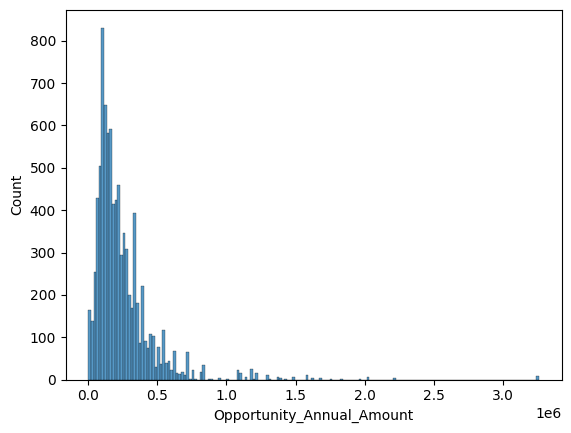

In [681]:
sns.histplot(data=data, x='Opportunity_Annual_Amount')

### Model Building

In [682]:
## Example of metric encoding
# def smape(y_true, y_pred):
#    assert len(y_true) == len(y_pred)
#
#    y_true = np.array(y_true)
#    y_pred = np.array(y_pred)
#
#    numerator = np.abs(y_true - y_pred)
#    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
#
#    smape_score = np.mean(numerator / denominator) * 100.0
#    return smape_score

In [683]:
# ClosedWon and Annual_Opportunity_Amount

X = train.drop('ClosedWon',axis=1)
X = X.drop('Opportunity_Annual_Amount', axis = 1)

y_closed = train['ClosedWon']
y_amount = train['Opportunity_Annual_Amount']

In [684]:
X_test = test.drop('ClosedWon',axis=1)
X_test = X_test.drop('Opportunity_Annual_Amount', axis = 1)

y_closed_test = test['ClosedWon']
y_amount_test = test['Opportunity_Annual_Amount']

In [685]:
def smape(actual, forecast):
    # Convert inputs to numpy arrays for vectorized operation
    actual = np.array(actual)
    forecast = np.array(forecast)

    # Calculate SMAPE
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    diff[denominator == 0] = 0  # Handle the case where denominator is zero

    return 100 * np.mean(diff)

In [ ]:
X

,Opportunity_ID,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Snapshot_Date_Year,Snapshot_Date_Month,...,WY,Initial_Estimate,Estimate_Difference,Expenses,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
0,0,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,10,...,0.0,0.051459,0.565764,0.003311,0.000000,0.0,1.0,0.0,0.422979,0.337959
1,0,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,11,...,0.0,0.051459,0.565764,0.003311,0.023152,0.0,1.0,0.0,0.422979,0.337959
2,0,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2019,12,...,0.0,0.051459,0.565764,0.003311,0.045556,0.0,1.0,0.0,0.422979,0.337959
3,0,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2020,3,...,0.0,0.051459,0.565764,0.003311,0.113518,0.0,1.0,0.0,0.422979,0.337959
4,0,0.027907,0.006831,0.011686,0.011812,0.172211,0.003346,0.006995,2020,4,...,0.0,0.051459,0.565764,0.003311,0.136669,0.0,1.0,0.0,0.422979,0.337959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,840,0.009302,0.021889,0.031822,0.055607,0.171123,0.016231,0.042360,2020,4,...,0.0,0.106960,0.565764,0.016213,0.136669,0.0,1.0,0.0,0.265436,0.190913
8807,840,0.009302,0.021889,0.031822,0.055607,0.171123,0.016231,0.042360,2020,5,...,0.0,0.106960,0.565764,0.016213,0.159074,0.0,1.0,0.0,0.265436,0.190913
8808,841,0.023256,0.017126,0.016573,0.025814,0.172867,0.008615,0.014549,2019,10,...,0.0,0.068315,0.565764,0.008572,0.000000,0.0,1.0,0.0,0.408020,0.344226
8809,841,0.023256,0.017126,0.016573,0.025814,0.172867,0.008615,0.014549,2019,11,...,0.0,0.068315,0.565764,0.008572,0.023152,0.0,1.0,0.0,0.408020,0.344226


### Random forest

In [687]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=500).fit(X, y_amount)

In [688]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# We evaluate our model based on 4 errors
pred_rfc_model = rfc.predict(X_test)
print('MAE:', mean_absolute_error(y_amount_test, pred_rfc_model))
print('RMSE:', mean_squared_error(y_amount_test, pred_rfc_model)**0.5)
print('MSE:',mean_squared_error(y_amount_test, pred_rfc_model))
print('SMAPE:',smape(y_amount_test, pred_rfc_model))

MAE: 36264.96669766089
RMSE: 112804.54896404753
MSE: 12724866266.982195
SMAPE: 32.85219410667075


<ipython-input-685-acc4598ed6ef>:8: RuntimeWarning:

invalid value encountered in divide



### RidgeRegressor

In [689]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer

score = make_scorer(smape, greater_is_better=False)
ridge = RidgeCV(alphas=(0.1,0.5,1,10,20,40,80,100,230), scoring=score)
ridge.fit(X, y_amount)

RidgeCV(alphas=(0.1, 0.5, 1, 10, 20, 40, 80, 100, 230),
        scoring=make_scorer(smape, greater_is_better=False))

In [690]:
pred_ridge_model = ridge.predict(X_test)
print('MAE:', mean_absolute_error(y_amount_test, pred_ridge_model))
print('RMSE:', mean_squared_error(y_amount_test, pred_ridge_model)**0.5)
print('MSE:',mean_squared_error(y_amount_test, pred_ridge_model))
print('SMAPE:',smape(y_amount_test, pred_ridge_model))

MAE: 1522.6201332263524
RMSE: 1791.5489103295165
MSE: 3209647.498102878
SMAPE: 3.964315930585738


### XGBoost - Opportunity Annual Amount

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X, y_amount)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgboost_model = model_xgb.predict(X_test)
print('MAE:', mean_absolute_error(y_amount_test, pred_xgboost_model))
print('RMSE:', mean_squared_error(y_amount_test, pred_xgboost_model)**0.5)
print('MSE:',mean_squared_error(y_amount_test, pred_xgboost_model))
print('SMAPE:',smape(y_amount_test, pred_xgboost_model))

MAE: 28758.12704758522
RMSE: 68473.98405412851
MSE: 4688686492.245046
SMAPE: 31.59292395345514


eta 0.01 - 0.3
gamma 0 - inf
max_depth - 3-6


### Hyperparameter tuning

In [691]:
data['Opportunity_Annual_Amount'].median()

186013.4783

In [692]:
## Hyperparameter optimization
etas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
gammas = [0, 0.1, 0.4, 0.6, 1, 2]
depths = [3, 4, 5, 6, 7, 8, 9, 10]

for eta in range(len(etas)):
  for gamma in range(len(gammas)):
    for depth in range(len(depths)):
      model_xgb = XGBRegressor(eta=etas[eta], gamma=gammas[gamma], max_depth=depths[depth])
      model_xgb.fit(X, y_amount)
      pred_xgboost_model = model_xgb.predict(X_test)
      print('eta: ' + str(etas[eta]) + ' gamma: ' + str(gammas[gamma]) + ' depth: ' + str(depths[depth]))
      print(mean_squared_error(y_amount_test, pred_xgboost_model)**0.5)





eta: 0.01 gamma: 0 depth: 3
125806.48378448725
eta: 0.01 gamma: 0 depth: 4
119898.66618145868
eta: 0.01 gamma: 0 depth: 5
109267.76753792341
eta: 0.01 gamma: 0 depth: 6
105781.04857559658


KeyboardInterrupt: ignored

### Classification - ClosedWon or Not

## XGBoost

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X, y_closed)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgboost_model = model_xgb.predict(X_test)
print('MAE:', mean_absolute_error(y_closed_test, pred_xgboost_model))
print('RMSE:', mean_squared_error(y_closed_test, pred_xgboost_model)**0.5)
print('MSE:',mean_squared_error(y_closed_test, pred_xgboost_model))
print('SMAPE:',smape(y_closed_test, pred_xgboost_model))

MAE: 0.09984432495336726
RMSE: 0.1813002989233815
MSE: 0.032869798389707494
SMAPE: 199.10396662914687


In [ ]:
## Hyperparameter optimization
etas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
gammas = [0, 0.1, 0.4, 0.6, 1, 2]
depths = [3, 4, 5, 6, 7, 8, 9, 10]

for eta in range(len(etas)):
  for gamma in range(len(gammas)):
    for depth in range(len(depths)):
      model_xgb = XGBRegressor(eta=etas[eta], gamma=gammas[gamma], max_depth=depths[depth])
      model_xgb.fit(X, y_closed)
      pred_xgboost_model = model_xgb.predict(X_test)
      print('eta: ' + str(etas[eta]) + ' gamma: ' + str(gammas[gamma]) + ' depth: ' + str(depths[depth]))
      print(mean_squared_error(y_closed_test, pred_xgboost_model)**0.5)


eta: 0.01 gamma: 0 depth: 3
0.1562010548476052
eta: 0.01 gamma: 0 depth: 4
0.15929816858166954
eta: 0.01 gamma: 0 depth: 5
0.1580343713471982
eta: 0.01 gamma: 0 depth: 6
0.1631483083006737
eta: 0.01 gamma: 0 depth: 7
0.17357661764901977
eta: 0.01 gamma: 0 depth: 8
0.16665885102045933
eta: 0.01 gamma: 0 depth: 9
0.17074147032020803
eta: 0.01 gamma: 0 depth: 10
0.17780143507342436
eta: 0.01 gamma: 0.1 depth: 3
0.15621113807094741
eta: 0.01 gamma: 0.1 depth: 4
0.1588961133986253
eta: 0.01 gamma: 0.1 depth: 5
0.1581952610118673
eta: 0.01 gamma: 0.1 depth: 6
0.1636721777533885
eta: 0.01 gamma: 0.1 depth: 7
0.1698182546665464
eta: 0.01 gamma: 0.1 depth: 8
0.16627538746039075
eta: 0.01 gamma: 0.1 depth: 9
0.17121837536976453
eta: 0.01 gamma: 0.1 depth: 10
0.17827214804510383
eta: 0.01 gamma: 0.4 depth: 3
0.15636077469661272
eta: 0.01 gamma: 0.4 depth: 4
0.15841961172112515
eta: 0.01 gamma: 0.4 depth: 5
0.15601924091332936
eta: 0.01 gamma: 0.4 depth: 6
0.1571395919507345
eta: 0.01 gamma: 0.4 d

In [553]:
## Annual Amount
from xgboost import XGBRegressor

model_xgb_annual = XGBRegressor(eta = 0.3, gamma = 0, max_depth = 3)
model_xgb_annual.fit(X, y_amount)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [554]:
## Classification ClosedWon
model_xgb_closed = XGBRegressor(eta = 0.01, gamma = 0, max_depth = 3)
model_xgb_closed.fit(X, y_closed)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Prediction Analysis

In [587]:
q3_1 = data[(data['Snapshot_Date_Year'] == 2023) & (data['Snapshot_Date_Quarter'] == 3)]
list(q3_1[q3_1['ClosedWon'] == 1]['Opportunity_ID'])

[606, 615, 766, 802]

In [588]:
q3_1 = q3_1[~q3_1['Opportunity_ID'].isin(list(q3_1[q3_1['ClosedWon'] == 1]['Opportunity_ID']))]

In [589]:
q3_2 = q3_1.copy()

In [590]:
q3_2['Snapshot_Date_Month'] = 8
q3_2 = q3_2.drop('Opportunity_Annual_Amount', axis = 1)
q3_2 = q3_2.drop('ClosedWon', axis = 1)
q3_2

,Opportunity_ID,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Snapshot_Date_Year,Snapshot_Date_Month,...,WY,Initial_Estimate,Estimate_Difference,Expenses,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
3167,235,0.106977,0.124838,0.233646,0.050902,0.232621,0.092502,0.234817,2023,8,...,0.0,0.030000,0.601960,0.091666,0.863331,1.0,1.0,1.0,0.361235,0.284691
3460,259,0.018605,0.037066,0.066793,0.050902,0.180456,0.030442,0.078102,2023,8,...,0.0,0.025200,0.546957,0.030300,0.590739,0.0,0.0,0.0,0.351369,0.278872
3822,290,0.009302,0.008178,0.020394,0.027278,0.201640,0.009483,0.024944,2023,8,...,0.0,0.064180,0.502254,0.009053,0.794623,1.0,1.0,1.0,0.427753,0.414727
4161,316,0.055814,0.045413,0.081336,0.076003,0.175429,0.032393,0.072518,2023,8,...,0.0,0.086980,0.492414,0.032319,0.749066,1.0,1.0,1.0,0.864736,0.777305
4908,377,0.083721,0.084067,0.077463,0.107799,0.168901,0.043010,0.084817,2023,8,...,0.0,0.081100,0.497368,0.043025,0.613144,0.0,1.0,0.0,0.343730,0.337511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,811,0.009302,0.008130,0.025333,0.021934,0.178404,0.012589,0.031650,2023,8,...,0.0,0.013644,0.565764,0.012473,0.000000,1.0,1.0,1.0,0.649586,0.406893
8521,812,0.000000,0.010151,0.013252,0.011812,0.191270,0.007384,0.011810,2023,8,...,0.0,0.018764,0.565764,0.007093,0.000000,0.0,0.0,0.0,0.385742,0.336392
8522,813,0.041860,0.046423,0.033990,0.056179,0.220291,0.019440,0.045088,2023,8,...,0.0,0.017404,0.565764,0.018761,0.000000,1.0,1.0,1.0,0.649586,0.406893
8523,814,0.111628,0.008828,0.019585,0.011812,0.172413,0.012260,0.033146,2023,8,...,0.0,0.011617,0.565764,0.012224,0.000000,1.0,1.0,1.0,0.892425,1.000000


In [ ]:
pred_amount = model_xgb_annual.predict(q3_2)
pred_closed = model_xgb_closed.predict(q3_2)

q3_2['Opportunity_Annual_Amount'] = pred_amount
q3_2['ClosedWonProbability'] = pred_closed

q3_2.loc[q3_2['ClosedWonProbability'] > 0.5, 'ClosedWon'] = 1
q3_2.loc[q3_2['ClosedWonProbability'] <= 0.5, 'ClosedWon'] = 0

In [577]:
(q3_2['ClosedWonProbability'] > 0.1).sum()

0

In [580]:
q3_3 = q3_2.copy()
q3_3['Snapshot_Date_Month'] = 9
q3_3 = q3_3.drop('Opportunity_Annual_Amount', axis = 1)
q3_3 = q3_3.drop('ClosedWon', axis = 1)
q3_3 = q3_3.drop('ClosedWonProbability', axis = 1)

pred_amount = model_xgb_annual.predict(q3_3)
pred_closed = model_xgb_closed.predict(q3_3)

q3_3['Opportunity_Annual_Amount'] = pred_amount
q3_3['ClosedWonProbability'] = pred_closed

q3_3.loc[q3_3['ClosedWonProbability'] > 0.5, 'ClosedWon'] = 1
q3_3.loc[q3_3['ClosedWonProbability'] <= 0.5, 'ClosedWon'] = 0

In [583]:
(q3_3['ClosedWonProbability'] > 0.05).sum()

40

In [582]:
q3_1_test = q3_1.copy()
q3_1_test['Snapshot_Date_Month'] = 9
q3_1_test = q3_1_test.drop('Opportunity_Annual_Amount', axis = 1)
q3_1_test = q3_1_test.drop('ClosedWon', axis = 1)
# q3_1_test = q3_1_test.drop('ClosedWonProbability', axis = 1)

pred_amount = model_xgb_annual.predict(q3_1_test)
pred_closed = model_xgb_closed.predict(q3_1_test)

q3_1_test['Opportunity_Annual_Amount'] = pred_amount
q3_1_test['ClosedWonProbability'] = pred_closed

q3_1_test.loc[q3_1_test['ClosedWonProbability'] > 0.5, 'ClosedWon'] = 1
q3_1_test.loc[q3_1_test['ClosedWonProbability'] <= 0.5, 'ClosedWon'] = 0

In [585]:
(q3_1_test['ClosedWonProbability'] > 0.5).sum()

0

In [591]:
from sklearn.linear_model import LogisticRegression
class_weights = {0: 1.0, 1: 5.0}
classifier = LogisticRegression(class_weight=class_weights)
classifier.fit(X, y_closed)
y_pred = classifier.predict(q3_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [596]:
check_data = data = pd.read_csv("./drive/MyDrive/processed_data.csv")
check_data

,Unnamed: 0,Snapshot_Date,Opportunity_ID,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,...,Initial_Estimate,Estimate_Difference,Expenses,Initial_Snapshot_Date,Opportunity_Age_Days,Recreational,Medical,Cultivation,Annual_Salary,Physicians_Annual_Salary
0,0,2019-10-01,0061K00000b3JMy,167838.3211,2019-03-05,2020-01-15,6.0,296.0,684.0,1904.0,...,167838.3211,0.0,1.449683e+09,2019-10-01,0,0.0,1.0,0.0,58470.0,89820.0
1,1,2019-11-01,0061K00000b3JMy,167838.3211,2019-03-05,2020-07-23,6.0,296.0,684.0,1904.0,...,167838.3211,0.0,1.449683e+09,2019-10-01,31,0.0,1.0,0.0,58470.0,89820.0
2,2,2019-12-01,0061K00000b3JMy,167838.3211,2019-03-05,2020-07-23,6.0,296.0,684.0,1904.0,...,167838.3211,0.0,1.449683e+09,2019-10-01,61,0.0,1.0,0.0,58470.0,89820.0
3,3,2020-03-01,0061K00000b3JMy,167838.3211,2019-03-05,2020-07-23,6.0,296.0,684.0,1904.0,...,167838.3211,0.0,1.449683e+09,2019-10-01,152,0.0,1.0,0.0,58470.0,89820.0
4,4,2020-04-01,0061K00000b3JMy,167838.3211,2019-03-05,2020-07-23,6.0,296.0,684.0,1904.0,...,167838.3211,0.0,1.449683e+09,2019-10-01,183,0.0,1.0,0.0,58470.0,89820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,8806,2020-04-01,0064100000a6Ou1,348860.0021,2018-10-30,2020-06-17,2.0,922.0,1854.0,8485.0,...,348860.0021,0.0,6.957270e+09,2019-10-01,183,0.0,1.0,0.0,53520.0,83250.0
8807,8807,2020-05-01,0064100000a6Ou1,348860.0021,2018-10-30,2020-04-24,2.0,922.0,1854.0,8485.0,...,348860.0021,0.0,6.957270e+09,2019-10-01,213,0.0,1.0,0.0,53520.0,83250.0
8808,8808,2019-10-01,0064100000a7CRV,222816.2855,2018-11-08,2019-11-15,5.0,724.0,968.0,4008.0,...,222816.2855,0.0,3.695699e+09,2019-10-01,0,0.0,1.0,0.0,58000.0,90100.0
8809,8809,2019-11-01,0064100000a7CRV,222816.2855,2018-11-08,2019-11-15,5.0,724.0,968.0,4008.0,...,222816.2855,0.0,3.695699e+09,2019-10-01,31,0.0,1.0,0.0,58000.0,90100.0


In [599]:
fig = px.scatter(data,
                 x='Snapshot_Date',
                 y='ClosedWon',
                 opacity=0.8,
                 hover_data=['Snapshot_Date'],
                 title='Employee vs Opportunity Annual Amount')
fig.update_traces(marker_size=5)
fig.show()

In [616]:
opportunities_per_month = check_data.groupby(['Snapshot_Date_Year', 'Snapshot_Date_Month'])['ClosedWon'].sum()
opportunities_per_month

Snapshot_Date_Year  Snapshot_Date_Month
2019                10                      0
                    11                      1
                    12                      4
2020                1                       8
                    2                       2
                    3                       0
                    4                       3
                    5                       6
                    6                       3
                    7                       1
                    8                       4
                    9                       2
                    10                      5
                    11                      1
                    12                      2
2021                1                      10
                    2                       2
                    3                       2
                    4                       2
                    5                       4
                    6                   

In [613]:
plt.figure(figsize=(10, 6))
plt.bar(
    opportunities_per_month.index,
    opportunities_per_month['ClosedWon'],
    tick_label=[f"{row['Snapshot_Date_Year']}-{row['Snapshot_Date_Month']:02d}" for _, row in opportunities_per_month.iterrows()]
)
plt.xlabel('Month')
plt.ylabel('Number of Closed Opportunities')
plt.title('Number of Closed Opportunities per Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

### Save model


In [ ]:
# import joblib
# aussie_rain = {
#     'model': model,
#     'imputer': imputer,
#     'scaler': scaler,
#     'encoder': encoder,
#     'input_cols': input_cols,
#     'target_col': target_col,
#     'numeric_cols': numeric_cols,
#     'categorical_cols': categorical_cols,
#     'encoded_cols': encoded_cols
# }

# joblib.dump(aussie_rain, 'aussie_rain.joblib')

In [ ]:
# aussie_rain2 = joblib.load('aussie_rain.joblib')